In [27]:
#Required Libraries
import math, copy
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
#Read train dataset
train_data = pd.read_csv(r'D:\Machine Learning\Projects\Salary Prediction\Dataset\Salary Data.csv')

In [29]:
train_data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [30]:
# train data
x_train = train_data['YearsExperience'].values
y_train = train_data['Salary'].values

# test data
x_test = np.array([1.2, 1.6, 1.9, 2.3])

#print(x_train)
#print(x_test)
print(x_train.shape)
print(y_train.shape)

(30,)
(30,)


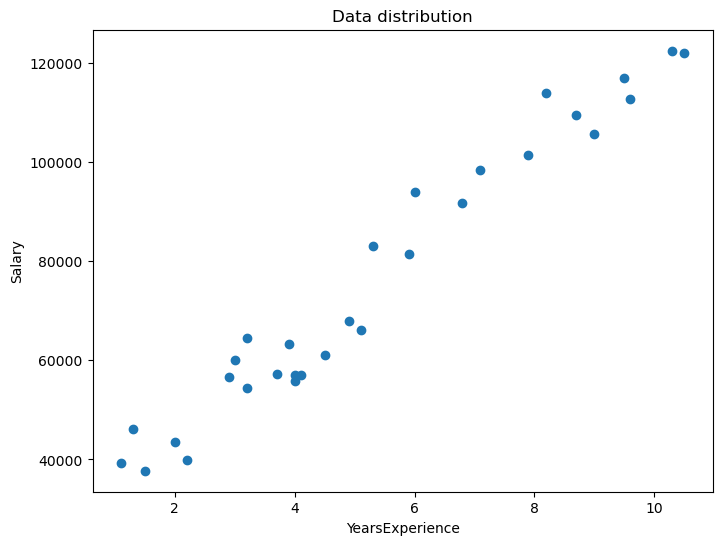

In [31]:
#Visualization the train data

plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.scatter(x_train, y_train)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [32]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [33]:
def compute_gradient(x, y, w, b): 
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [34]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append(cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [35]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.34e+09  dj_dw: -4.774e+05, dj_db: -7.600e+04   w:  4.774e+03, b: 7.60030e+02
Iteration 1000: Cost 1.65e+07  dj_dw:  9.014e+01, dj_db: -6.074e+02   w:  9.875e+03, b: 2.29266e+04
Iteration 2000: Cost 1.56e+07  dj_dw:  1.085e+01, dj_db: -7.310e+01   w:  9.501e+03, b: 2.54474e+04
Iteration 3000: Cost 1.56e+07  dj_dw:  1.305e+00, dj_db: -8.796e+00   w:  9.456e+03, b: 2.57507e+04
Iteration 4000: Cost 1.56e+07  dj_dw:  1.571e-01, dj_db: -1.058e+00   w:  9.451e+03, b: 2.57872e+04
Iteration 5000: Cost 1.56e+07  dj_dw:  1.890e-02, dj_db: -1.274e-01   w:  9.450e+03, b: 2.57916e+04
Iteration 6000: Cost 1.56e+07  dj_dw:  2.274e-03, dj_db: -1.533e-02   w:  9.450e+03, b: 2.57921e+04
Iteration 7000: Cost 1.56e+07  dj_dw:  2.737e-04, dj_db: -1.844e-03   w:  9.450e+03, b: 2.57922e+04
Iteration 8000: Cost 1.56e+07  dj_dw:  3.294e-05, dj_db: -2.219e-04   w:  9.450e+03, b: 2.57922e+04
Iteration 9000: Cost 1.56e+07  dj_dw:  3.963e-06, dj_db: -2.671e-05   w:  9.450e+03, b: 2.57922e+04


## Predictions

In [36]:
m_train = x_train.shape[0]
train_predicted = np.zeros(m_train)

for i in range(m_train):
    train_predicted[i] = w_final * x_train[i] + b_final
    print(f'Train Predicted_{i} is: {train_predicted[i]}')

Train Predicted_0 is: 36187.15873955563
Train Predicted_1 is: 38077.15120429758
Train Predicted_2 is: 39967.143669039535
Train Predicted_3 is: 44692.12483089442
Train Predicted_4 is: 46582.11729563638
Train Predicted_5 is: 53197.09092223323
Train Predicted_6 is: 54142.0871546042
Train Predicted_7 is: 56032.07961934616
Train Predicted_8 is: 56032.07961934616
Train Predicted_9 is: 60757.06078120104
Train Predicted_10 is: 62647.053245942996
Train Predicted_11 is: 63592.04947831397
Train Predicted_12 is: 63592.04947831397
Train Predicted_13 is: 64537.04571068495
Train Predicted_14 is: 68317.03064016886
Train Predicted_15 is: 72097.01556965278
Train Predicted_16 is: 73987.00803439473
Train Predicted_17 is: 75877.00049913669
Train Predicted_18 is: 81546.97789336255
Train Predicted_19 is: 82491.97412573353
Train Predicted_20 is: 90051.94398470136
Train Predicted_21 is: 92886.93268181427
Train Predicted_22 is: 100446.9025407821
Train Predicted_23 is: 103281.89123789503
Train Predicted_24 is: 1

Text(0.5, 0, 'YearsExperience')

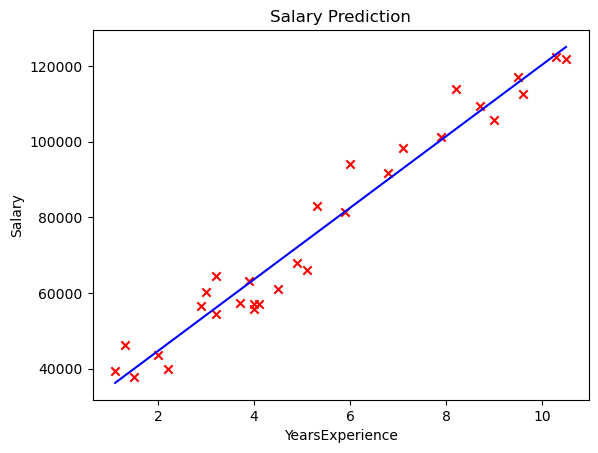

In [37]:
# Plot the linear fit
plt.plot(x_train, train_predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Salary Prediction")
# Set the y-axis label
plt.ylabel('Salary')
# Set the x-axis label
plt.xlabel('YearsExperience')

### Test Data

In [26]:
m_test = x_test.shape[0]
test_predicted = np.zeros(m_test)

for i in range(m_test):
    test_predicted[i] = w_final * x_test[i] + b_final
    print(f'Test Predicted_{i} is: {test_predicted[i]}')

Test Predicted_0 is: 37132.154971926604
Test Predicted_1 is: 40912.13990141051
Test Predicted_2 is: 43747.12859852344
Test Predicted_3 is: 47527.11352800735
